In [1]:
import os
import statistics
import scipy as sp
import import_ipynb
import math
import pandas as pd
#pd.get_option("display.max_rows")
#pd.reset_option("display.max_rows")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

importing Jupyter notebook from Licencjat_DataViz.ipynb


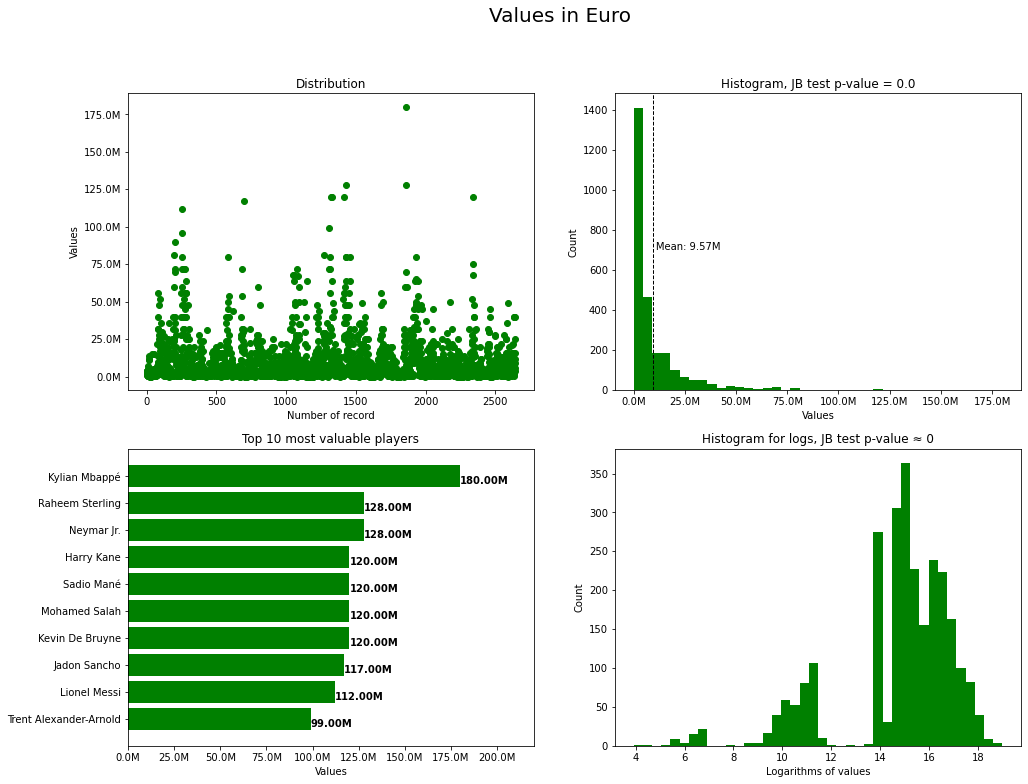

<string>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:90: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
<string>:106: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:106: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
<string>:121: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:121: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


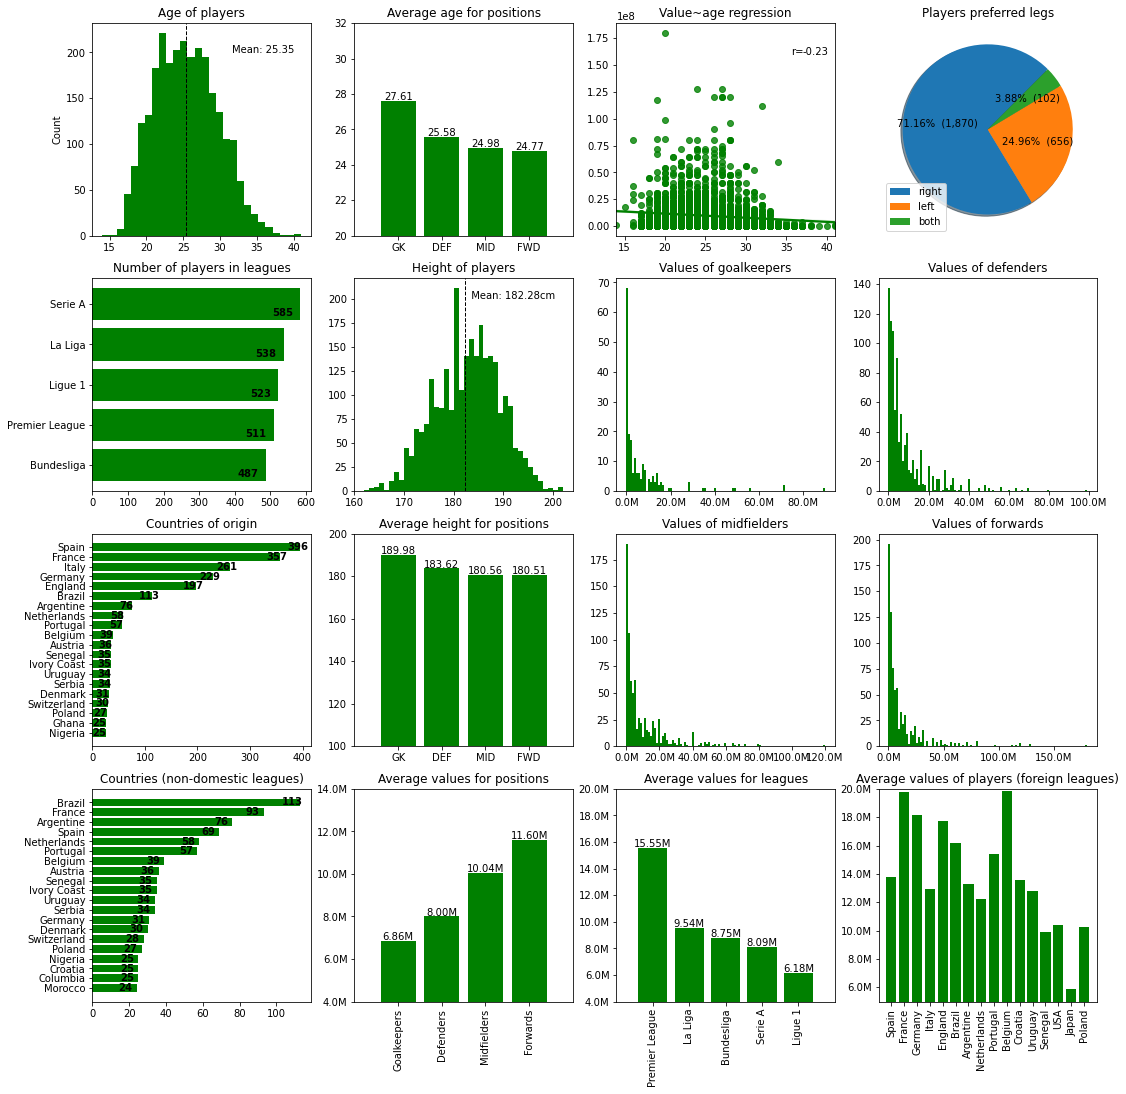

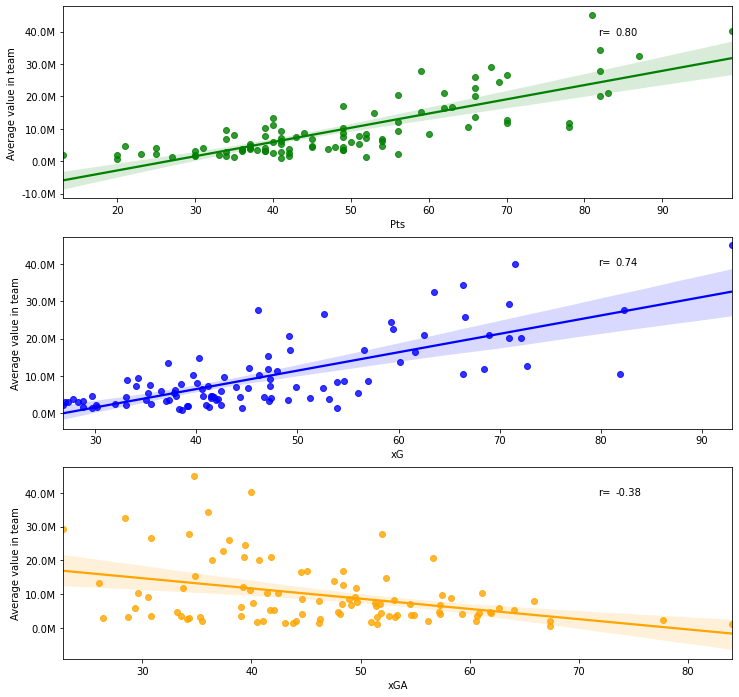

In [2]:
os.chdir(' ') #set proper directory depending where you put that project
import Licencjat_DataViz as DataViz

importing Jupyter notebook from Licencjat_Modelling_Goalkeepers.ipynb
0.37745486769861747 0.05474278866559145 9


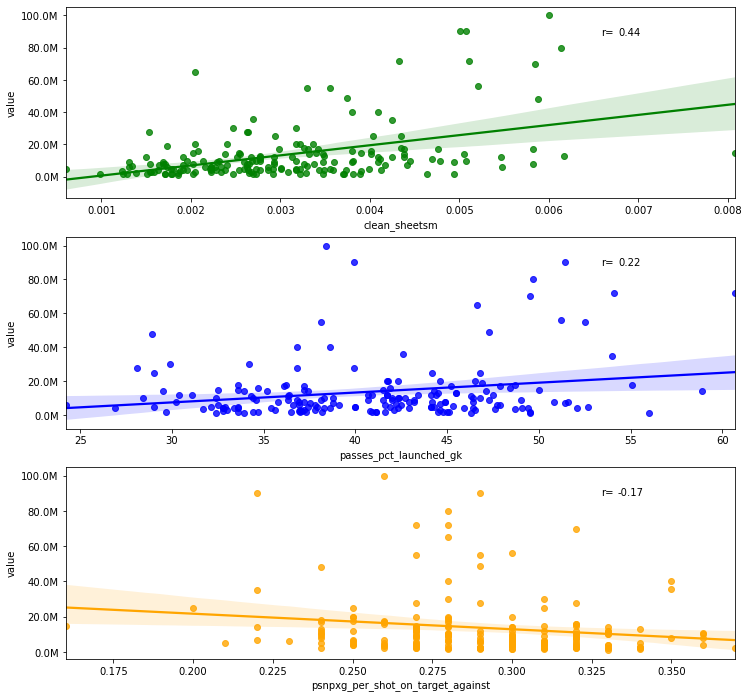

In [3]:
os.chdir(' ') #set proper directory depending where you put that project
import Licencjat_Modelling_Goalkeepers as GK

importing Jupyter notebook from Licencjat_Modelling_Defenders.ipynb


<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

2.254414022896363 0.9937604081109251 13


<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


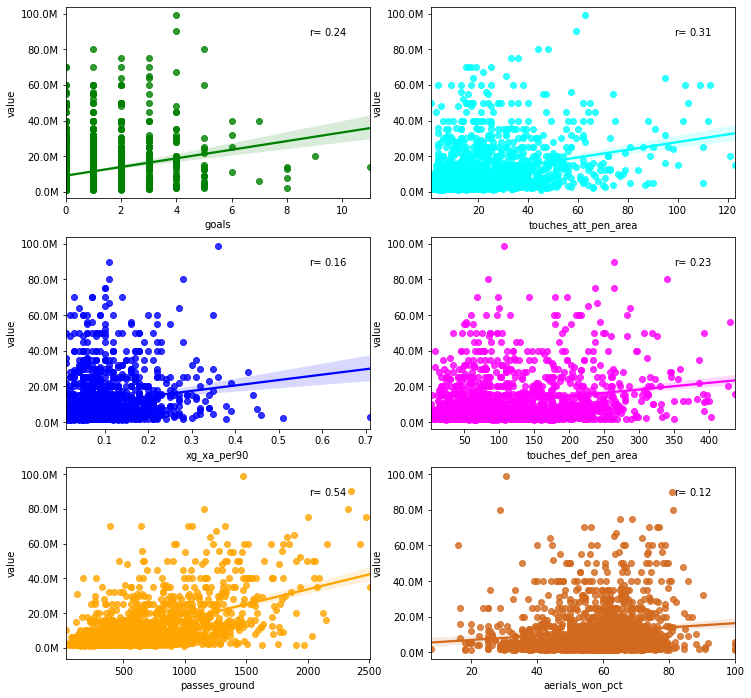

In [4]:
os.chdir(' ') #set proper directory depending where you put that project
import Licencjat_Modelling_Defenders as DEF

importing Jupyter notebook from Licencjat_Modelling_Midfielders.ipynb
2.2963398583489614 0.9947344379098917 13


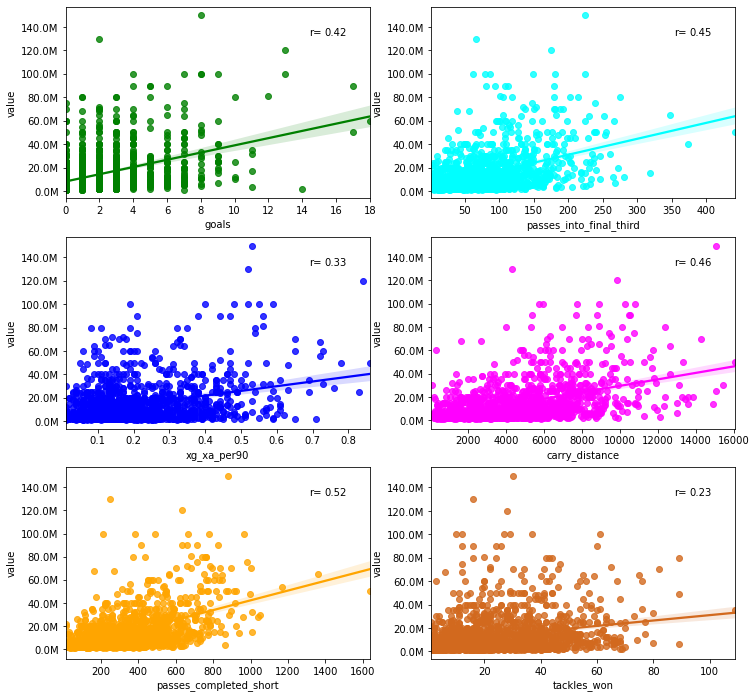

In [5]:
os.chdir(' ') #set proper directory depending where you put that project
import Licencjat_Modelling_Midfielders as MID

importing Jupyter notebook from Licencjat_Modelling_Forwards.ipynb
1.415270559130518 0.8554126558882577 13


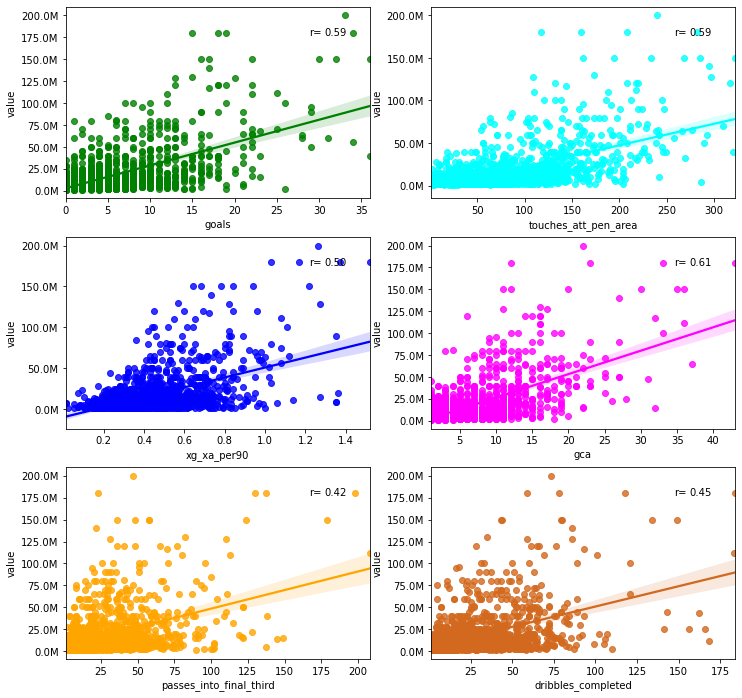

In [6]:
os.chdir(' ') #set proper directory depending where you put that project
import Licencjat_Modelling_Forwards as FWD

In [7]:
#correlations
#correlations=pd.concat([GK.show,DEF.show,MID.show,FWD.show],axis=1)
#further editions in Excel
#!pip install openpyxl
#correlations.columns=['Goalkeepers','Defenders','Midfielders','Forwards']
#correlations.to_excel(r'C:\Users\rafal\Desktop\dane do licencjatu\data\correlations.xlsx')
#os.system('start EXCEL.EXE correlations.xlsx')

In [8]:
#data wrangling
data=pd.DataFrame.append(GK.dataGK,[DEF.dataDEF,MID.dataMID,FWD.dataFWD])
dataseason1920=data[data['Season_201920#']==1]
dataseason1819=data[data['Season_201819#']==1]
dataseason1718=data[data['Season_201718#']==1]
#applying weights
w1920=1
w1819=0.7846
w1718=0.6648
dataseason1920['weights']=w1920
dataseason1920['predsOLS']=w1920*dataseason1920['predsOLS']
dataseason1819['weights']=w1819
dataseason1819['predsOLS']=w1819*dataseason1819['predsOLS']
dataseason1718['weights']=w1718
dataseason1718['predsOLS']=w1718*dataseason1718['predsOLS']
datafinal=pd.DataFrame.append(dataseason1920,[dataseason1819,dataseason1718])

<ipython-input-8-7dd96efae9b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseason1920['weights']=w1920
<ipython-input-8-7dd96efae9b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataseason1920['predsOLS']=w1920*dataseason1920['predsOLS']
<ipython-input-8-7dd96efae9b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [10]:
#to excel for potential editions by hand
#datafinal.to_excel(r'C:\Users\rafal\Desktop\dane do licencjatu\data\predictions.xlsx')
#os.system('start EXCEL.EXE predictions.xlsx')

In [12]:
#grouping by all intercepts
dfGK = pd.DataFrame(pd.read_html(GK.finalGK1.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef'])
dfDEF = pd.DataFrame(pd.read_html(DEF.finalDEF1.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef'])
dfMID = pd.DataFrame(pd.read_html(MID.finalMID1.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef'])
dfFWD = pd.DataFrame(pd.read_html(FWD.finalFWD1.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef'])
df=pd.concat([dfGK,dfDEF,dfMID,dfFWD],axis=1)
df.columns=['Goalkeepers','Defenders','Midfielders','Forwards']
df

,Goalkeepers,Defenders,Midfielders,Forwards
Intercept,18.2627,16.7882,16.75600,16.8190
age,-0.1200,-0.0937,-0.09050,-0.0816
CL,0.2470,0.2775,0.17600,0.2616
wins_gk,0.0782,NaN,NaN,NaN
draws_gk,0.0416,NaN,NaN,NaN
passes_pct_launched_gk,0.0126,NaN,NaN,NaN
psnpxg_per_shot_on_target_against,-3.7805,NaN,NaN,NaN
isPremierLeague,0.5528,0.5194,0.53990,0.5938
isLigue1,-0.4227,-0.2413,-0.34680,-0.3772
clean_sheetsm,63.7429,NaN,NaN,NaN


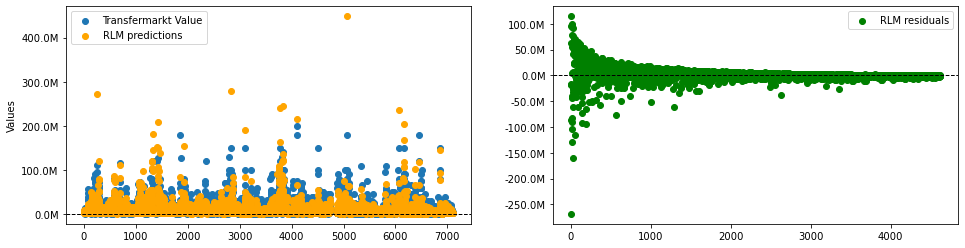

In [13]:
#data viz

#datafinal['predsOLS']=np.exp(datafinal['predsOLS']) 
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = mpl.ticker.FuncFormatter(millions)

#check=smf.ols('ln(value)~isPremierLeague+isLigue1+isSerieA+isBundesliga',data=DEF.dataDEF).fit()
#check.summary()
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].scatter(datafinal.index, datafinal['value'], label='Transfermarkt Value')
ax[0].scatter(datafinal.index, datafinal['predsOLS'], label='RLM predictions', color='orange')
ax[0].yaxis.set_major_formatter(formatter)
ax[0].set_ylabel('Values')
ax[0].axhline(0, color='k', linestyle='dashed', linewidth=1)
ax[0].legend(loc='best')

datafinal=datafinal.sort_values('value',ascending=False)   
datafinal=datafinal.reset_index()

ax[1].scatter(datafinal.index, datafinal['value']-datafinal['predsOLS'], label='RLM residuals', color='green')
ax[1].yaxis.set_major_formatter(formatter)
ax[1].legend(loc='best')
ax[1].axhline(0, color='k', linestyle='dashed', linewidth=1)

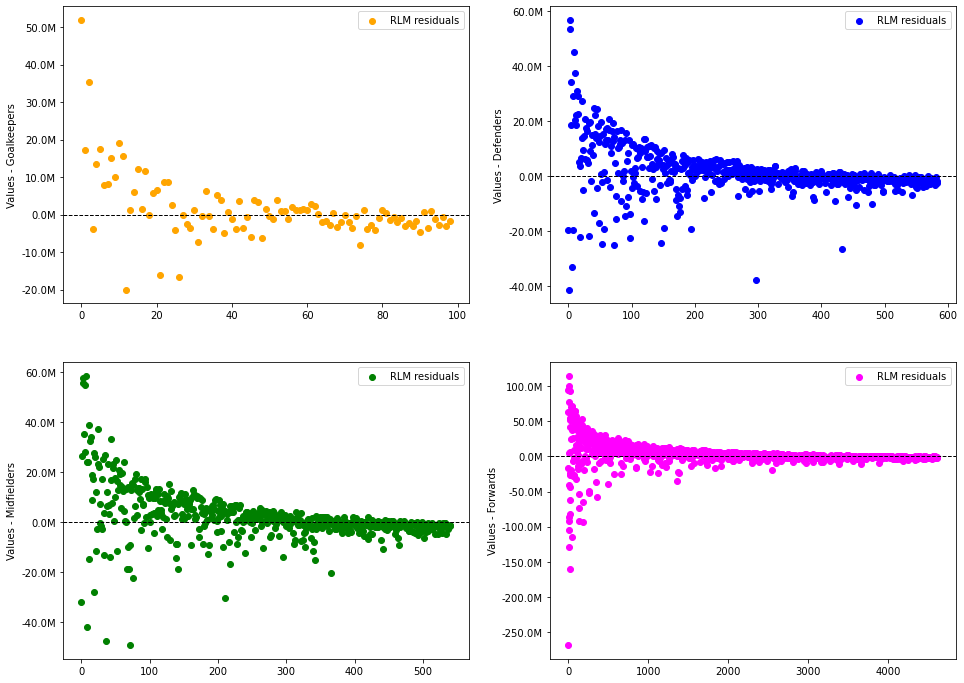

In [14]:
#data viz
GK.dataGK=GK.dataGK.sort_values('value',ascending=False)
DEF.dataDEF=DEF.dataDEF.sort_values('value',ascending=False)
MID.dataMID=MID.dataMID.sort_values('value',ascending=False)
dataFWD = datafinal[datafinal['position2'].str[:7]=='Forward']
dataFWD2 = datafinal[datafinal['position2'].str[:6]=='attack']
dataFWD=pd.DataFrame.append(dataFWD,dataFWD2)
FWD.dataFWD=FWD.dataFWD.sort_values('value',ascending=False)

GK.dataGK=GK.dataGK[GK.dataGK['Season_201920#']==1].reset_index()
DEF.dataDEF=DEF.dataDEF[DEF.dataDEF['Season_201920#']==1].reset_index()
MID.dataMID=MID.dataMID[MID.dataMID['Season_201920#']==1].reset_index()
FWD.dataFWD=FWD.dataFWD[FWD.dataFWD['Season_201920#']==1].reset_index()

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0,0].scatter(GK.dataGK.index, GK.dataGK['value']-GK.dataGK['predsOLS'], label='RLM residuals', color='orange')
ax[0,0].yaxis.set_major_formatter(formatter)
ax[0,0].set_ylabel('Values - Goalkeepers')
ax[0,0].legend(loc='best')
ax[0,0].axhline(0, color='k', linestyle='dashed', linewidth=1)

ax[0,1].scatter(DEF.dataDEF.index, DEF.dataDEF['value']-DEF.dataDEF['predsOLS'], label='RLM residuals', color='blue')
ax[0,1].yaxis.set_major_formatter(formatter)
ax[0,1].set_ylabel('Values - Defenders')
ax[0,1].legend(loc='best')
ax[0,1].axhline(0, color='k', linestyle='dashed', linewidth=1)

ax[1,0].scatter(MID.dataMID.index, MID.dataMID['value']-MID.dataMID['predsOLS'], label='RLM residuals', color='green')
ax[1,0].yaxis.set_major_formatter(formatter)
ax[1,0].legend(loc='best')
ax[1,0].set_ylabel('Values - Midfielders')
ax[1,0].axhline(0, color='k', linestyle='dashed', linewidth=1)

ax[1,1].scatter(dataFWD.index, dataFWD['value']-dataFWD['predsOLS'], label='RLM residuals', color='magenta')
ax[1,1].yaxis.set_major_formatter(formatter)
ax[1,1].legend(loc='best')
ax[1,1].set_ylabel('Values - Forwards')
ax[1,1].axhline(0, color='k', linestyle='dashed', linewidth=1)

In [15]:
#calculating MAE
GK.dataGK['MAE']=abs(GK.dataGK['predsOLS']-GK.dataGK['value'])
DEF.dataDEF['MAE']=abs(DEF.dataDEF['predsOLS']-DEF.dataDEF['value'])
MID.dataMID['MAE']=abs(MID.dataMID['predsOLS']-MID.dataMID['value'])
FWD.dataFWD['MAE']=abs(FWD.dataFWD['predsOLS']-FWD.dataFWD['value'])

leagueGK=GK.dataGK.groupby('isPremierLeague').mean()['MAE']
leagueDEF=DEF.dataDEF.groupby('isPremierLeague').mean()['MAE']
leagueMID=MID.dataMID.groupby('isPremierLeague').mean()['MAE']
leagueFWD=FWD.dataFWD.groupby('isPremierLeague').mean()['MAE']

league=leagueGK.append([leagueDEF,leagueMID,leagueFWD])
league

isPremierLeague
0    4.948713e+06
1    5.710016e+06
0    4.739418e+06
1    6.710639e+06
0    5.411955e+06
1    9.026920e+06
0    7.565980e+06
1    1.309224e+07
Name: MAE, dtype: float64

In [21]:
#calculating errors for benchmark comparison
os.chdir(' ') #set proper directory depending where you put that project
transfers=pd.read_csv('transfers.csv',engine='python',sep=';')
datafinal['player']=datafinal['player'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
transfers['ď»żPlayer']=transfers['ď»żPlayer'].apply(lambda x: ''.join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
#transfery=datafinal.merge(transfers,left_on='player',right_on='ď»żPlayer')
transfery=datafinal[datafinal['Season_201920#']==1].merge(transfers,left_on='player',right_on='ď»żPlayer')
transfery=transfery.groupby('player').mean()
transfery['transfermarkt error']=abs(transfery['transfer fee']-transfery['value'])
transfery['RLM error']=abs(transfery['transfer fee']-transfery['predsOLS'])
pd.DataFrame(transfery[['transfermarkt error','RLM error']])
transfery=transfery[transfery['Season_201920#']>0]
print(np.mean(transfery['transfermarkt error']),np.mean(transfery['RLM error']))
pd.DataFrame(transfery[['transfermarkt error','RLM error']])

4698275.862068965 7870524.661434155


,transfermarkt error,RLM error
player,,
Aaron Mooy,5000000.0,4.993784e+06
Aaron Ramsdale,8000000.0,4.433466e+06
Abdoulaye Doucour,2000000.0,6.680544e+06
Achraf Hakimi,14000000.0,4.192906e+07
Alberto Grassi,1000000.0,2.719067e+06
...,...,...
Yannick Carrasco,5000000.0,1.643931e+07
lex Berenguer,8000000.0,4.804810e+06
lvaro Gonzlez,2000000.0,5.757705e+05


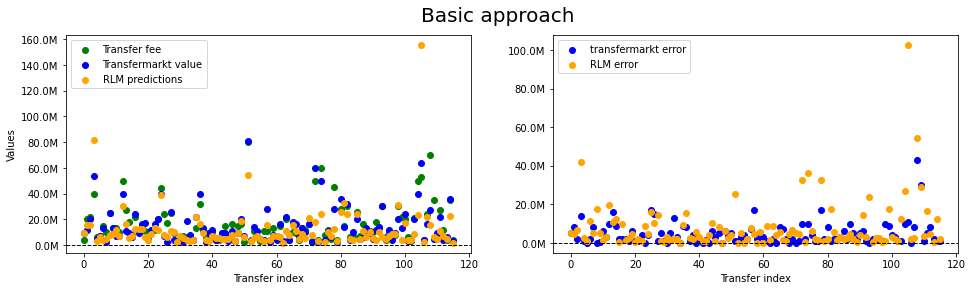

In [22]:
#final data viz

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('Basic approach', fontsize=20)

transfery=transfery.reset_index()

ax[0].scatter(transfery.index, transfery['transfer fee'], label='Transfer fee',color='green')
ax[0].scatter(transfery.index, transfery['value'], label='Transfermarkt value',color='blue')
ax[0].scatter(transfery.index, transfery['predsOLS'], label='RLM predictions', color='orange')
ax[0].set_ylabel('Values')
ax[0].set_xlabel('Transfer index')
ax[0].yaxis.set_major_formatter(formatter)
ax[0].axhline(0, color='k', linestyle='dashed', linewidth=1)
ax[0].legend(loc='best')

ax[1].scatter(transfery.index, transfery['transfermarkt error'], label='transfermarkt error', color='blue')
ax[1].scatter(transfery.index, transfery['RLM error'], label='RLM error',color='orange')
ax[1].legend(loc='best')
ax[1].yaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Transfer index')
ax[1].axhline(0, color='k', linestyle='dashed', linewidth=1)
